In [1]:
# project: p8
# submitter: wxia9
# partner: none
import csv
import copy
import matplotlib, pandas

In [2]:
# copied from https://automatetheboringstuff.com/chapter14/
def get_mapping(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    mapping = dict()
    for i  in range(len(exampleData)):
        mapping[exampleData[i][0]] = exampleData[i][1] 
    return mapping

In [3]:
#q1
mapping = get_mapping("small_mapping.csv")
mapping

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [4]:
#q2
mapping['nm0752751']

'Mitchell Ryan'

In [5]:
#q3
nm = []
for k in mapping:
    if(k[0:2] == 'nm'):
        nm.append(mapping[k])
nm

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [6]:
#q4
check = []
for k in mapping:
    receiver = mapping[k].split(" ")
    if(receiver[0].lower() == 'gary'):
        check.append(k)
smallMap = mapping;
check

['nm0000997', 'nm0001219']

In [7]:
def get_raw_movies(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    header = exampleData.pop(0)
    exampleFile.close()
    mapping = []
    bucket = dict()
    subbucket = []
    for i  in range(len(exampleData)):
        subbucket = []
        bucket = dict()
        for j in range(len(exampleData[i])):
            if j == header.index('year'):
                exampleData[i][j] = int(exampleData[i][j])
            if j == header.index('rating'):
                exampleData[i][j] = float(exampleData[i][j])
            if(j >= header.index('directors')):
                subbucket = exampleData[i][j].split(",")
                bucket[header[j]] = subbucket
            else:
                bucket[header[j]] = exampleData[i][j]
        mapping.append(bucket)
    return mapping

In [8]:
#q5
smallMov = get_raw_movies("small_movies.csv")
smallMov

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [9]:
#q6
len(smallMov[0]['genres'])

3

In [10]:
#q7
smallMov[1]['actors'][len(smallMov[1]['actors']) - 1]

'nm0752751'

In [11]:
def get_movies(movie,mapping):
    mapdata = get_mapping(mapping)
    movdata = get_raw_movies(movie)
    for i in range(len(movdata)):
        for k in movdata[i]:
            if k == 'title':
                for t in mapdata:
                    if t == movdata[i][k]:
                        movdata[i][k] = mapdata[t]
                        break;
            elif(k == 'directors' or k == 'actors'):
                for d in range(len(movdata[i][k])):
                    for t2 in mapdata:
                        if t2 == movdata[i][k][d]:
                            movdata[i][k][d] = mapdata[t2]
                            break;
    return movdata

In [12]:
#q8
small = get_movies("small_movies.csv", "small_mapping.csv")
small[0]["title"]

'Runaway Jury'

In [13]:
#q9
small[1]["actors"]

['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [14]:
#q10
small[-1]["directors"]

['Richard Donner']

In [15]:
#q11
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [16]:
#q12
movies = get_movies("movies.csv", "mapping.csv")
movies[0:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [17]:
#q13
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [18]:
# you are not allowed to change this function
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

In [19]:
#q14
filter1931 = filter_movies_by_year(copy.deepcopy(movies), 1931)
filter1931

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [20]:
#q15
filter1932 = filter_movies_by_year(copy.deepcopy(movies), 1932)
filter1932

[{'title': 'Texas Cyclone',
  'year': 1932,
  'rating': 6.2,
  'directors': ['D. Ross Lederman'],
  'actors': ['Wallace MacDonald', 'Tim McCoy', 'Wheeler Oakman', 'John Wayne'],
  'genres': ['Action', 'Western']},
 {'title': 'Haunted Gold',
  'year': 1932,
  'rating': 5.5,
  'directors': ['Mack V. Wright'],
  'actors': ['Otto Hoffman',
   'John Wayne',
   'Duke',
   'Harry Woods',
   'Erville Alderson'],
  'genres': ['Horror', 'Mystery', 'Western']},
 {'title': 'Girl Crazy',
  'year': 1932,
  'rating': 6.3,
  'directors': ['William A. Seiter'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Eddie Quillan'],
  'genres': ['Comedy']},
 {'title': 'Hot Saturday',
  'year': 1932,
  'rating': 6.6,
  'directors': ['William A. Seiter'],
  'actors': ['Cary Grant', 'Randolph Scott', 'Edward Woods'],
  'genres': ['Drama', 'Romance']},
 {'title': 'Lady and Gent',
  'year': 1932,
  'rating': 5.7,
  'directors': ['Stephen Roberts'],
  'actors': ['Morgan Wallace',
   'George Bancroft',
   'Charles St

In [21]:
def unique(name):
    unique = []
    for i in range(len(movies)):
        for t in range(len(movies[i][name])):
            if not movies[i][name][t] in unique:
                unique.append(movies[i][name][t])
    return unique

In [22]:
#q16
genre = unique('genres')
len(genre)

18

In [23]:
#q17
director = unique("directors")
len(director)

1247

In [24]:
#q18
index = 0;
for i in range(len(movies)):
    if len(movies[i]['actors']) > len(movies[index]['actors']):
        index = i
movies[index]['title']

'Shoulder Arms'

In [25]:
#q19
total = 0
for i in range(len(movies)):
    total += movies[i]['rating']
total/len(movies)

6.401659528907912

In [26]:
#q20
index = 0;
for i in range(len(movies)):
    if len(movies[i]['title']) > len(movies[index]['title']):
        index = i
movies[index]['title']

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [27]:
def bucketize(movie_list, movie_key):
    bucket = dict()
    receiver = []
    for i in range(len(movie_list)):
        receiver = []
        if type(movie_list[i][movie_key]) is list:
            for j in range(len(movie_list[i][movie_key])):
                receiver = []
                if movie_list[i][movie_key][j] in bucket:
                    bucket[movie_list[i][movie_key][j]].append(movie_list[i])
                else:
                    receiver.append(movie_list[i])
                    bucket[movie_list[i][movie_key][j]] = receiver
        else:
            if movie_list[i][movie_key] in bucket:
                bucket[movie_list[i][movie_key]].append(movie_list[i])
            else:
                receiver.append(movie_list[i])
                bucket[movie_list[i][movie_key]] = receiver
    return bucket
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [28]:
#q21
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [29]:
#q22
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [30]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [31]:
#q24
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [32]:
#q25
len(bucketize(small, "actors"))

7

In [33]:
#q26
len(bucketize(movies, "actors"))

2605

In [34]:
#q27
genresDict = dict()
receiver = bucketize(movies, "genres")
for k in receiver:
    genresDict[k] = len(receiver[k])
genresDict

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [35]:
#from the p8-lab...https://github.com/tylerharter/cs301-projects/tree/master/fall19/lab-p8b
def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

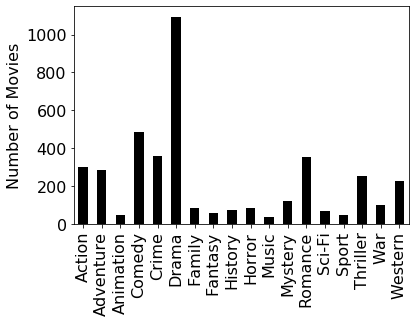

In [36]:
#q28
plot = genresDict
%matplotlib inline
plot_dict(plot, "Number of Movies")

In [37]:
def filter_year(movies, flag, year):
    i = 0
    while i < len(movies):
        if flag == 0:
            if movies[i]["year"] > year:
                movies.pop(i)
            else:
                i += 1
        else:
            if movies[i]["year"] < year:
                movies.pop(i)
            else:
                i += 1
    return movies

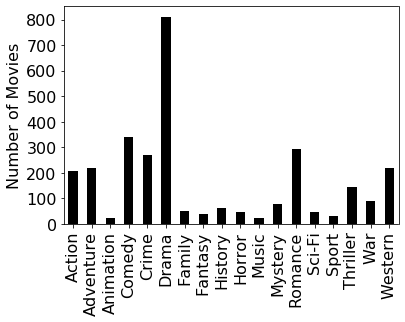

In [38]:
#q29
prior2000 = filter_year(copy.deepcopy(movies), 0, 2000)
priorGenre = dict()
receiver = bucketize(prior2000, "genres")
for k in receiver:
    priorGenre[k] = len(receiver[k])
plot_dict(priorGenre, "Number of Movies")

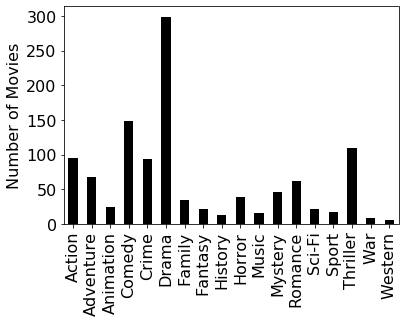

In [39]:
#q30
after2000 = filter_year(copy.deepcopy(movies), 1, 2000)
afterGenre = dict()
receiver = bucketize(after2000, "genres")
for k in receiver:
    afterGenre[k] = len(receiver[k])
plot_dict(afterGenre, "Number of Movies")

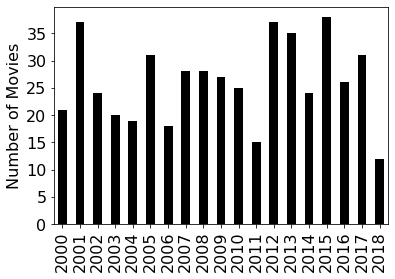

In [40]:
#q31
include2000 = filter_year(copy.deepcopy(movies), 1, 2000)
yearBuck = dict()
receiver = bucketize(include2000, 'year')
for k in receiver:
    yearBuck[k] = len(receiver[k])
plot_dict(yearBuck, "Number of Movies")

In [41]:
#q32
directors = bucketize(copy.deepcopy(movies), 'directors')
span30 = dict()
lowest = 2019;
highest = 0;
for k in directors:
    lowest = 2019
    highest = 0
    if type(directors[k]) is list:
        for t in range(len(directors[k])):
            if lowest > directors[k][t]['year']:
                lowest = directors[k][t]['year']
            if highest < directors[k][t]['year']:
                highest = directors[k][t]['year']
    if (highest - lowest) >= 30:
        span30[k] = highest - lowest
span30

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [42]:
#q33
actors = bucketize(copy.deepcopy(movies), 'actors')
span50 = dict()
lowest = 2019;
highest = 0;
for k in actors:
    lowest = 2019
    highest = 0
    if type(actors[k]) is list:
        for t in range(len(actors[k])):
            if lowest > actors[k][t]['year']:
                lowest = actors[k][t]['year']
            if highest < actors[k][t]['year']:
                highest = actors[k][t]['year']
    if (highest - lowest) >= 50:
        span50[k] = highest - lowest
span50

{'Kurt Russell': 50,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Glenn Ford': 52,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'George Burns': 60,
 'Dean Stockwell': 53}

In [43]:
def row_ranking(row):
    return row["span"]

In [44]:
#q34
directors = bucketize(copy.deepcopy(movies), 'directors')
span = dict()
namespan = dict()
spanlist = []
lowest = 2019;
highest = 0;
for k in directors:
    lowest = 2019
    highest = 0
    namespan = dict()
    if type(directors[k]) is list:
        for t in range(len(directors[k])):
            if lowest > directors[k][t]['year']:
                lowest = directors[k][t]['year']
            if highest < directors[k][t]['year']:
                highest = directors[k][t]['year']
        span[k] = highest - lowest
    namespan['name'] = k
    namespan['span'] = span[k]
    spanlist.append(namespan)
spanlist.sort(key=row_ranking, reverse=True)
spanlist[0:10]

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [45]:
#q35
actors = bucketize(copy.deepcopy(movies), 'actors')
span = dict()
namespan = dict()
spanlist = []
lowest = 2019;
highest = 0;
for k in actors:
    lowest = 2019
    highest = 0
    namespan = dict()
    if type(actors[k]) is list:
        for t in range(len(actors[k])):
            if lowest > actors[k][t]['year']:
                lowest = actors[k][t]['year']
            if highest < actors[k][t]['year']:
                highest = actors[k][t]['year']
        span[k] = highest - lowest
    namespan['name'] = k
    namespan['span'] = span[k]
    spanlist.append(namespan)
spanlist.sort(key=row_ranking, reverse=True)
spanlist[0:10]

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [46]:
def row_median(row):
    return row["rating"]

In [47]:
#q36
fullgenres = bucketize(movies, 'genres')
result = []
for k in fullgenres:
    receiver = dict()
    fullgenres[k].sort(key=row_median)
    receiver['category'] = k
    if len(fullgenres[k])%2 == 1:
        receiver['rating'] = fullgenres[k][len(fullgenres[k])//2]['rating']
    else:
        receiver['rating'] = (fullgenres[k][len(fullgenres[k])//2]['rating']+fullgenres[k][len(fullgenres[k])//2-1]['rating'])/2
    receiver['count'] = len(fullgenres[k])
    result.append(receiver)
result.sort(key=row_median,reverse=True)
result[0:3]

[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [48]:
#q37
fullgenres = bucketize(movies, 'year')
result = []
for k in fullgenres:
    receiver = dict()
    fullgenres[k].sort(key=row_median)
    receiver['category'] = k
    if len(fullgenres[k])%2 == 1:
        receiver['rating'] = fullgenres[k][len(fullgenres[k])//2]['rating']
    else:
        receiver['rating'] = (fullgenres[k][len(fullgenres[k])//2]['rating'] + fullgenres[k][len(fullgenres[k])//2 - 1]['rating'])/2
    receiver['count'] = len(fullgenres[k])
    result.append(receiver)
result.sort(key=row_median,reverse=True)
result[0:10]

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]

In [49]:
#q38
receiver = []
for i in range(len(result)):
    if result[i]['count'] > 9:
        if(len(receiver) == 5):
            break;
        receiver.append(result[i])
receiver

[{'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17}]

In [50]:
#q39
fullgenres = bucketize(movies, 'directors')
result = []
for k in fullgenres:
    receiver = dict()
    fullgenres[k].sort(key=row_median)
    receiver['category'] = k
    if len(fullgenres[k])%2 == 1:
        receiver['rating'] = fullgenres[k][len(fullgenres[k])//2]['rating']
    else:
        receiver['rating'] = (fullgenres[k][len(fullgenres[k])//2]['rating'] + fullgenres[k][len(fullgenres[k])//2 - 1]['rating'])/2
    receiver['count'] = len(fullgenres[k])
    result.append(receiver)
result.sort(key=row_median,reverse=True)
receiver = []
for i in range(len(result)):
    if result[i]['count'] > 2:
        if(len(receiver) == 4):
            break;
        receiver.append(result[i])
receiver

[{'category': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'category': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'category': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'category': 'Sergio Leone', 'rating': 8.3, 'count': 7}]

In [51]:
#q40
fullgenres = bucketize(movies, 'actors')
result = []
for k in fullgenres:
    receiver = dict()
    fullgenres[k].sort(key=row_median)
    receiver['category'] = k
    if len(fullgenres[k])%2 == 1:
        receiver['rating'] = fullgenres[k][len(fullgenres[k])//2]['rating']
    else:
        receiver['rating'] = (fullgenres[k][len(fullgenres[k])//2]['rating'] + fullgenres[k][len(fullgenres[k])//2 - 1]['rating'])/2
    receiver['count'] = len(fullgenres[k])
    result.append(receiver)
result.sort(key=row_median,reverse=True)
receiver = []
for i in range(len(result)):
    if result[i]['count'] > 4:
        if(len(receiver) == 3):
            break;
        receiver.append(result[i])
receiver

[{'category': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'category': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'category': 'Robert Lindsay', 'rating': 8.2, 'count': 6}]